<a href="https://www.kaggle.com/code/richardhhong/beginner-neural-network?scriptVersionId=166382055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


2024-03-11 00:22:22.359626: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-11 00:22:22.359851: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-11 00:22:22.497493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Disclaimer
I am by no means someone who is competent in the field of Data Science and Machine Learning. I am simply a someone who is studying Machine Learning on the side for fun. So there may be parts of my code that can be alterted to better fit industry standards that I am not aware of. If so, please let me know in the comments.

I hope this notebook will be of help~

# Loading Data

In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

print('train shape is:', train.shape)
print('test shape is:', test.shape)
train.head()

train shape is: (42000, 785)
test shape is: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# setting things to things
Y_train_df = train['label']
X_train_df = train.drop(labels = ['label'], axis = 1)

Y_train_df.head(10)

0    1
1    0
2    1
3    4
4    0
5    0
6    7
7    3
8    5
9    3
Name: label, dtype: int64

# Viewing the Data

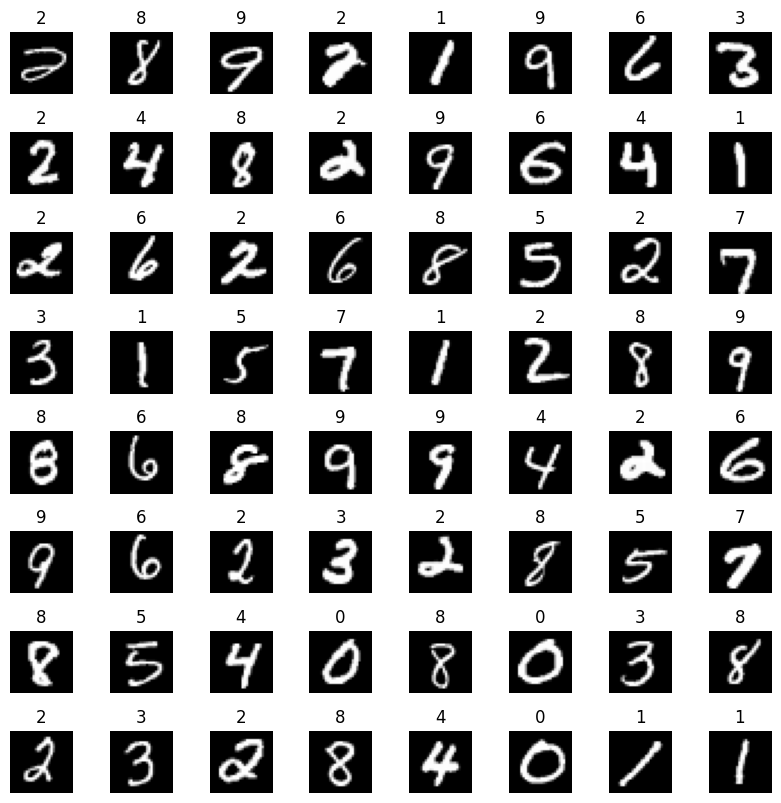

In [4]:
m, n = X_train_df.shape

# Subplot of 8 rows of 8 digits
fig, axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i, ax in enumerate(axes.flat):
    # taking random index
    random_index = np.random.randint(m)
    
    # adjusting the dataframe into numpy array with size 28x28
    X_train_random_reshaped = X_train_df.iloc[random_index].values.reshape((28, 28))
    
    # adding the label as a title
    ax.imshow(X_train_random_reshaped, cmap = 'gray')
    ax.set_title(Y_train_df.iloc[random_index])
    ax.set_axis_off()

In [5]:
# turning everything into numpy arrays
X_train = X_train_df.values.reshape((len(X_train_df)), -1)
Y_train = Y_train_df.values

X_test = test.values.reshape((len(test)), -1)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(42000, 784)
(28000, 784)
(42000,)


# Building the Model

Since this is just a practice and a basic introduction into the world of Neural Networks and Deep learning, a simple fully connected Neural Network will be used. However, A Convolutional Neural Network may perform better because of its use of filters and pooling (may make a notebook using CNN in the future).

In [6]:
model = Sequential(
    [
        tf.keras.Input(shape = (784,)), # since each image is 28x28, the input shape is (784,)
        Dense(64, activation = 'relu'), # don't worry too much about the number of nodes in each layer or activation function, both can be modified to improve performance
        Dense(64, activation = 'relu'),
        Dense(10, activation = 'softmax')
    ], name = 'model_1'
)

In [7]:
Y_train.shape

(42000,)

In [8]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 55050 (215.04 KB)
Trainable params: 55050 (215.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),metrics=['accuracy']
)
model.fit(
        X_train,Y_train, epochs = 20, batch_size = 64 # epochs and batch size can also be adjusted later to increase performance
)

Epoch 1/20
657/657 [==============================] - 2s 2ms/step - loss: 2.6390 - accuracy: 0.8034
Epoch 2/20
657/657 [==============================] - 1s 2ms/step - loss: 0.4605 - accuracy: 0.9051
Epoch 3/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2909 - accuracy: 0.9287
Epoch 4/20
657/657 [==============================] - 1s 2ms/step - loss: 0.2161 - accuracy: 0.9419
Epoch 5/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1830 - accuracy: 0.9486
Epoch 6/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1563 - accuracy: 0.9555
Epoch 7/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1384 - accuracy: 0.9606
Epoch 8/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1219 - accuracy: 0.9631
Epoch 9/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1228 - accuracy: 0.9640
Epoch 10/20
657/657 [==============================] - 2s 2ms/step - loss: 0.1028 - accuracy: 0.9693

In [10]:
# testing
prediction = model.predict(X_test)
res = np.argmax(prediction, axis=1)

875/875 [==============================] - 1s 1ms/step


In [11]:
results = pd.Series(res, name="Label")
submission = pd.concat([pd.Series(range(1, X_test.shape[0] + 1), name="ImageId"), results], axis=1)
submission.to_csv("submission.csv", index=False)

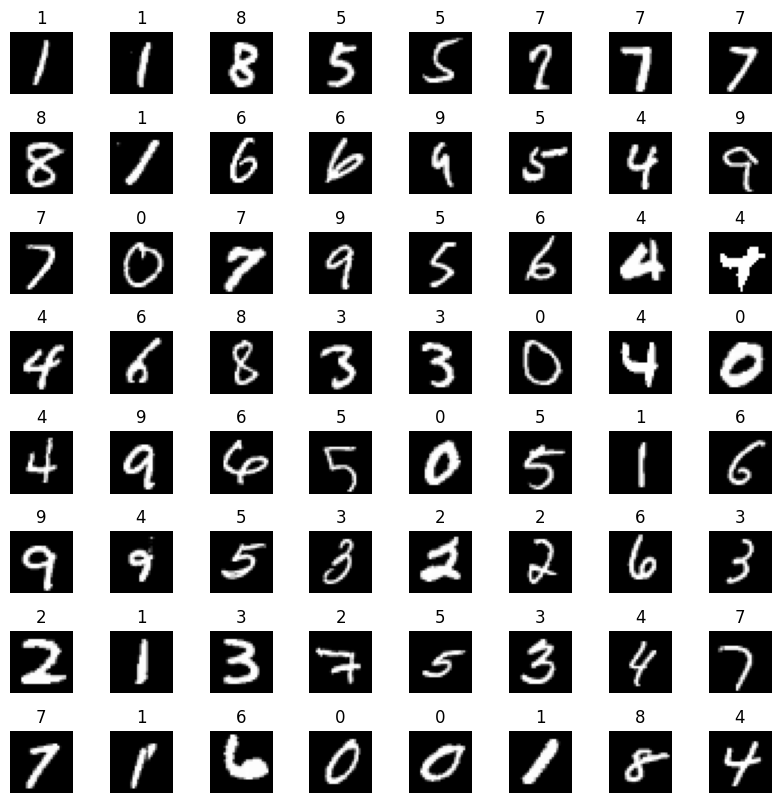

In [12]:
# viewing submission
m, n = X_test.shape

# Subplot of 8 rows of 8 digits
fig, axes = plt.subplots(8,8, figsize = (8,8))
fig.tight_layout(pad = 0.1)

for i, ax in enumerate(axes.flat):
    # taking random index
    random_index = np.random.randint(m)
    
    # adjusting the dataframe into numpy array with size 28x28
    X_test_random_reshaped = X_test[random_index].reshape((28, 28))
    
    # adding the label as a title
    ax.imshow(X_test_random_reshaped, cmap = 'gray')
    ax.set_title(results.iloc[random_index])
    ax.set_axis_off()

    #it tried it's best and thats all that matters <3